# Using the Wisconsin Breast Cancer Dataset
# we will perform the following:
    1. Caclulate the mean, median and standard deviation of the "perimeter" feature of the input data
    2. Figure out if the first feature is normally distributed?
       If it isn't then what could be a more appropriate distribution?
    3. Train and compare the results between two classifiers:
       SVM & Logistic Regression. 
    
 

Please note: The data file is attached to this repository and should be kept in the same directory from which the notebook is being executed. 

In [1]:
#Import libraries
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import numpy as np
import seaborn as sb

In [2]:
# Setup training data
# and define the various coloumn headers 

input_data_filename = "data.csv"

id_header = "id"
diagnosis_header = "diagnosis"
radiusMean_header = "radius_mean"
textureMean_header = "texture_mean"
perimeterMean_header = "perimeter_mean"
areaMean_header = "area_mean"
smoothnessMean_header = "smoothness_mean"
compactnessMean_header = "compactness_mean"
concavityMean_header = "concavity_mean"
concavePointsMean_header = "concave points_mean"
symmetryMean_header = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSe_header = "radius_se"
textureSe_header = "texture_se"
perimeterSe_header = "perimeter_se"
areaSe_header = "area_se"
smoothnessSe_header = "smoothness_se"
compactnessSe_header = "compactness_se"
concavitySe_header = "concavity_se"
concavePointsSe_header = "concave points_se"
symmetrySe_header = "symmetry_se"
fractalDimensionSe_header = "fractal_dimension_se"
radiusWorst_header = "radius_worst"
textureWorst_header = "texture_worst"
perimeterWorst_header = "perimeter_worst"
areaWorst_header = "area_worst"
smoothnessWorst_header = "smoothness_worst"
compactnessWorst_header = "compactness_worst"
concavityWorst_header = "concavity_worst"
concavePointsWorst_header = "concave points_worst"
symmetryWorst_header = "symmetry_worst"
fractalDimensionWorst_header = "fractal_dimension_worst"

In [3]:
# Read training data from the "data.csv"
input_data_coloumns = [ id_header, diagnosis_header, radiusMean_header, textureMean_header, perimeterMean_header,
                       areaMean_header, smoothnessMean_header, compactnessMean_header, concavityMean_header,
                       concavePointsMean_header, symmetryMean_header, fractalDimensionMean, radiusSe_header, 
                       textureSe_header, perimeterSe_header, areaSe_header, smoothnessSe_header, compactnessSe_header,
                       concavitySe_header, concavePointsSe_header, symmetrySe_header, fractalDimensionSe_header, 
                       radiusWorst_header, textureWorst_header, perimeterWorst_header, areaWorst_header, smoothnessWorst_header,
                       compactnessWorst_header, concavityWorst_header, concavePointsWorst_header, symmetryWorst_header,
                       fractalDimensionWorst_header]

# Reading the data using Pandas. We will skip the first row because it contains headers. 
input_data = pd.read_csv(input_data_filename, names=input_data_coloumns, delimiter=',', skiprows=1)

# From this training data we will find the count of the Malignant and Benign cancers present
print ("Number of Malignant tumors: ", input_data.id[input_data.diagnosis == "M"].count())
print ("Number of Benign tumors: ", input_data.id[input_data.diagnosis == "B"].count())


Number of Malignant tumors:  212
Number of Benign tumors:  357


## Caculate the mean, median and standard deviation of the "perimeter" feature of the input data

In [4]:
# Using pandas we will calculate the mean, median and standard deviation of the "periemter" feature
# of the input data.
perimeter_feature_mean = input_data['perimeter_mean'].mean()
perimeter_feature_median = input_data['perimeter_mean'].median()
perimeter_feature_standardDeviation = input_data['perimeter_mean'].std()
print('The mean value of the perimenter feature is: ', perimeter_feature_mean)
print('The median value of the perimenter feature is: ', perimeter_feature_median)
print('The standard deviation of the perimenter feature is: ', perimeter_feature_standardDeviation)

# The other way to calculatae mean, median and standard deviation along with other attributes is 
# by using the describe function. Here the 50% value describes the median.
print("\nCalculating mean, median & standard deviation using the describe() function:")
print(input_data['perimeter_mean'].describe())

print("\nThe 50% value is the median value for the \"perimeter_mean\" feature")

The mean value of the perimenter feature is:  91.96903339191566
The median value of the perimenter feature is:  86.24
The standard deviation of the perimenter feature is:  24.2989810387549

Calculating mean, median & standard deviation using the describe() function:
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

The 50% value is the median value for the "perimeter_mean" feature


## Figure out if the "radius" feautre is normally distributed or not

### Check if feature is normally distributed

In [5]:
# To find out if the "radius" feature is normally distributed of not
# we will first calculate the mean and standard deviation of the feature.

radius_feature_mean = input_data['radius_mean'].mean()
radius_feature_standardDeviation = input_data['radius_mean'].std()

# Now we will check if the data is normally ditributed or not using numpy.
radius_feature_distribution = abs(np.random.normal(radius_feature_mean, radius_feature_standardDeviation, 1)) < 0.5
print(radius_feature_distribution)

[False]


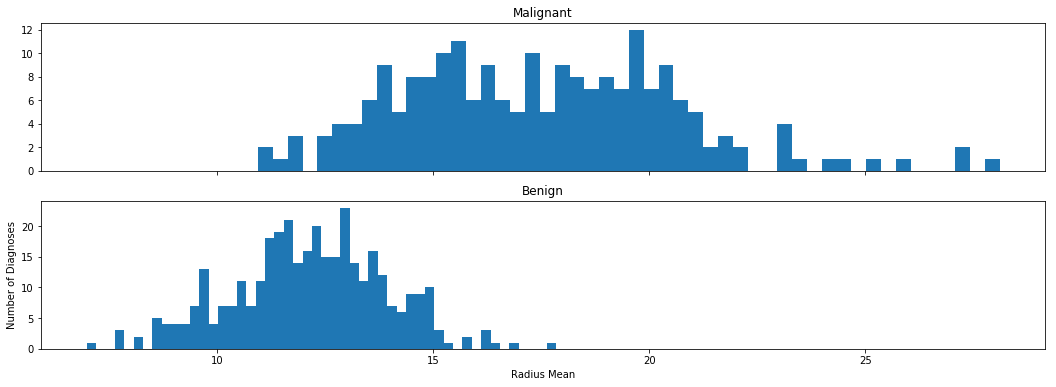

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,6))

bins = 50

ax1.hist(input_data.radius_mean[input_data.diagnosis == "M"], bins)
ax1.set_title('Malignant')

ax2.hist(input_data.radius_mean[input_data.diagnosis == "B"], bins)
ax2.set_title('Benign')

plt.xlabel('Radius Mean')
plt.ylabel('Number of Diagnoses')
plt.show()

Based on the above results we can confirm that the radius feature for the Malignant Tumors isn't normally distributed but are more uniformly distributed.  

The Benign tumors are more normally distributed. 

# Train and compare the results between two classifiers:
  ## SVM & Logistic Regression

### Preparing the dataset 
* The data will be split into 80-20.
   * 80% for training & 20% for testing

* We must first identify which features we would like to train our 
  model on. For this we will select the features that aren't correllated. 
  This helps in reducing data duplication during the model training phase.

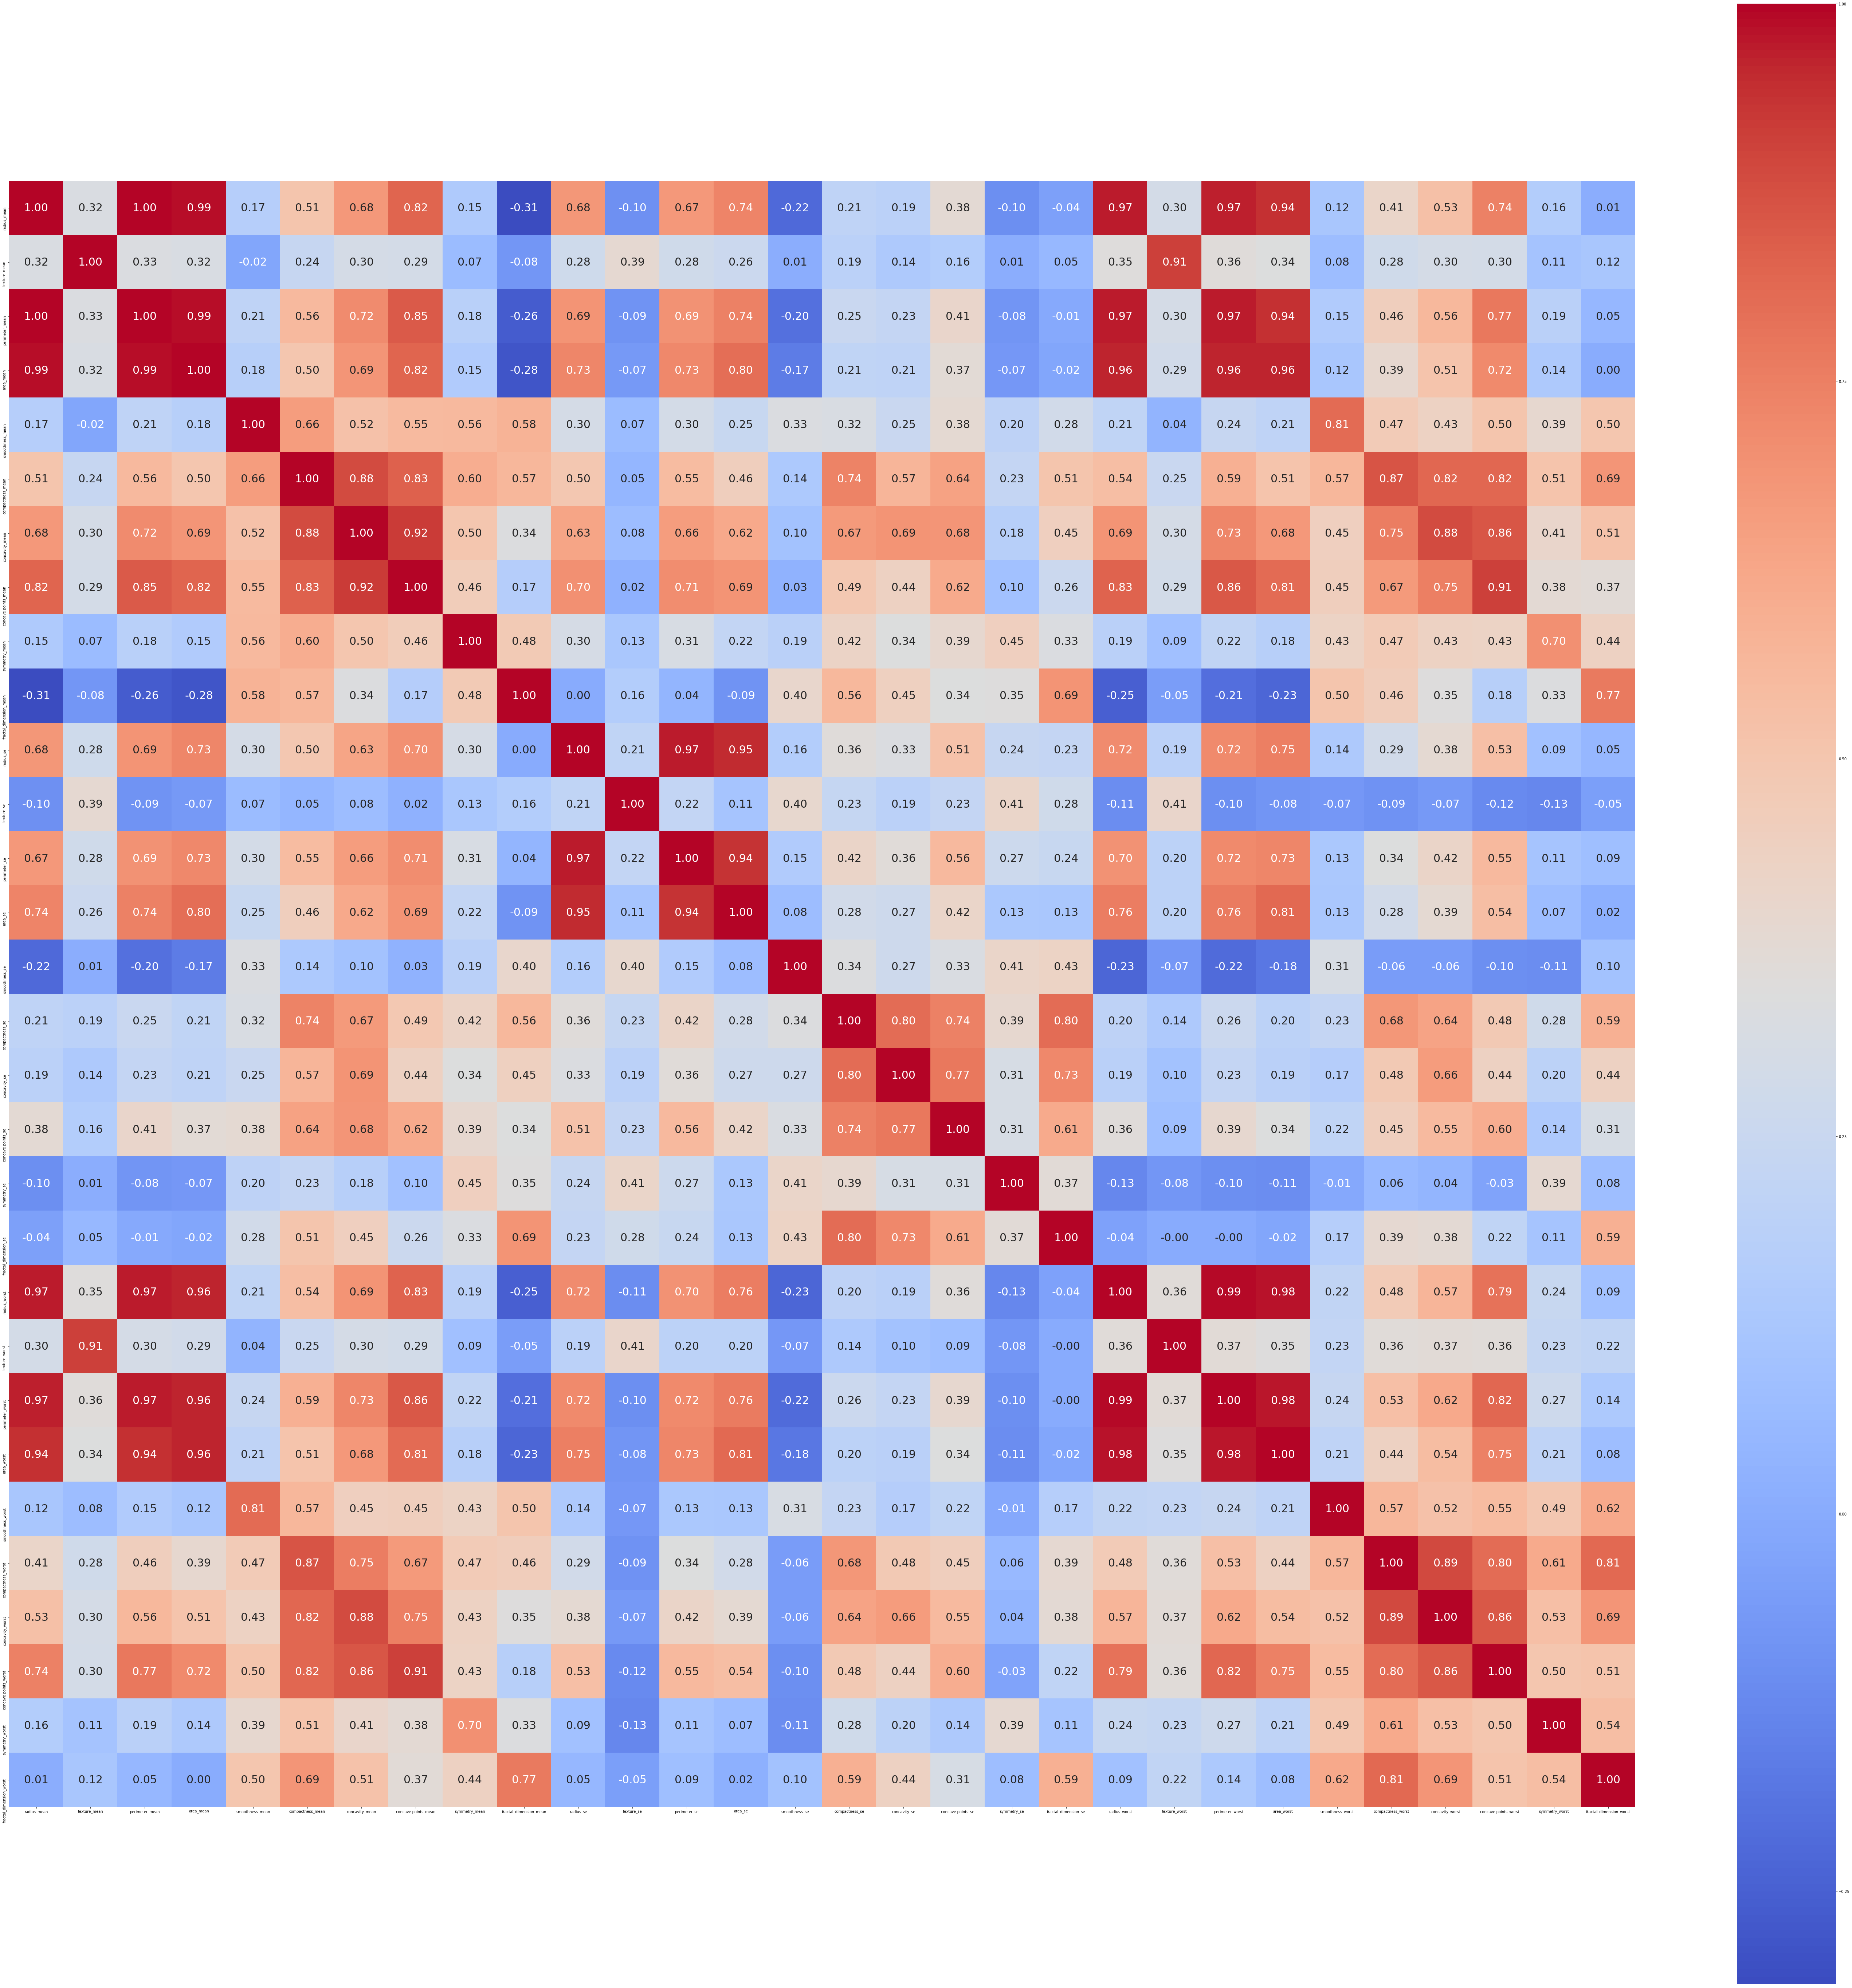

In [7]:
# We will first identify which features to 
# use by generating a heatmap of the dataset and saving it to a file 'heatmap.png'

# Before we correlate data, we will drop the 'id_header' value as it is only an identifer
# and has no impact on the actual quality of the data
input_data.drop("id", axis=1, inplace=True)

# Correlating features
correlating_features = input_data.corr()
plt.figure(figsize=(100,100))
sb_heatmap = sb.heatmap(correlating_features, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size':30},
           cmap= 'coolwarm')
sb_plot = sb_heatmap.get_figure()
sb_plot.savefig('heatmap.png')

The above heatmap gives us the correlation between various features present in the dataset. Red refers to highly correlated i.e. the feature can be infered from another feature, and blue refers to loosely correlated i.e. the feature is difficult to infer from any other feature. The correlation value is between 0-1. 

For the purposes of our training we will split the dataset into mean, se & worst feautres. We will only use the 'mean' feature values to train out model.

Features being used: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


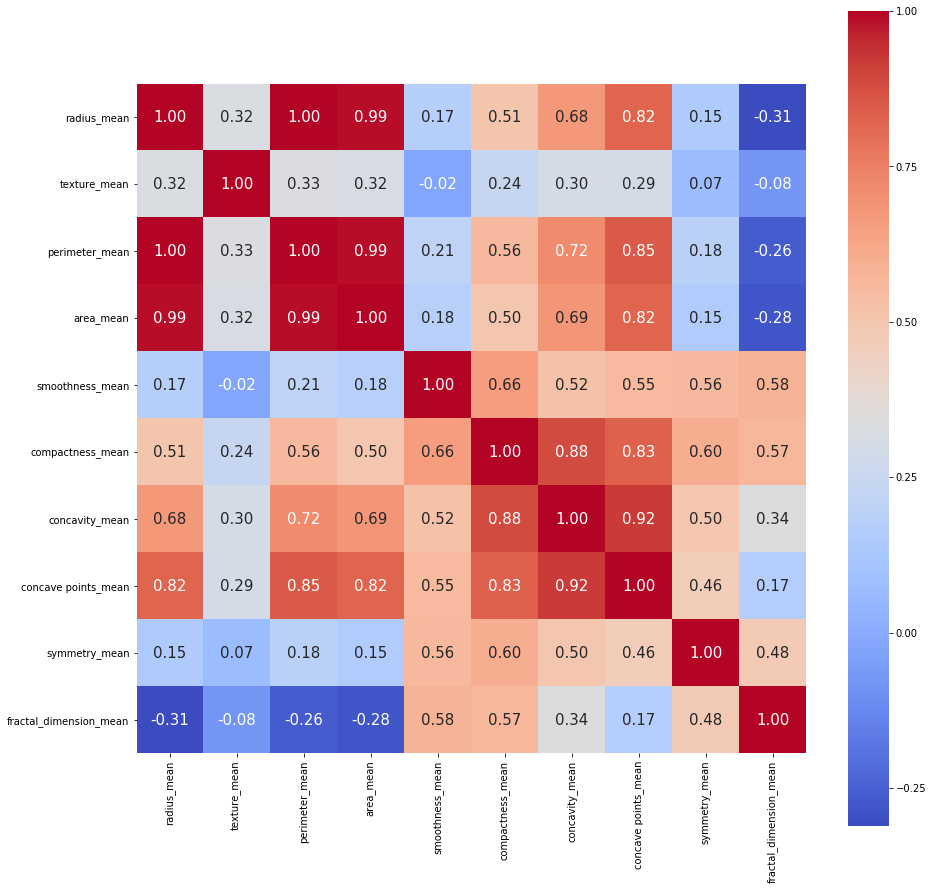

In [8]:
# Correlate only the 'mean' features to eliminate data overlap
mean_features = list(input_data.columns[1:11])
print("Features being used:", mean_features)


# Correlating Mean features
correlating_mean_features = input_data[mean_features].corr()
plt.figure(figsize=(15,15))
sb_mean_heatmap = sb.heatmap(correlating_mean_features, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size':15},
           cmap= 'coolwarm')
sb_mean_plot = sb_mean_heatmap.get_figure()
sb_mean_plot.savefig('mean_features_heatmap.png')

From the above heatmap we can infer the following:
 * 'radius_mean', 'perimeter_mean' & 'area_mean' are highly correlated. Therefore we can use 1 of them. We will use 'area_mean'
 * 'concavity_mean', 'concave_points_mean' & 'compactness_mean' are highly corelated as well. Therefore we can use 1 of them. We will use 'compactness_mean'
 

In [9]:
# Creating final feature set for modelling 
prediction_feature_set = ['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                         'symmetry_mean', 'fractal_dimension_mean']

In [10]:
# Since we are performing logistic regression and SVM to detect
# Malignant & Benign Cancers, which can be described as a binary problem, 
# we will relabel Malignant as 1 & Benign as 0.

input_data.diagnosis = input_data.diagnosis.replace(
      to_replace=['M', 'B'], value=[1,0])


In [1]:
# Now we will split the data for training and testing
training_set

NameError: name 'np' is not defined